In [1]:
#%% markdown

#Name: Suman Raman Poudel
#Course Title: MSCS 634: Data Mining
#Lab Assignment Title: Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering




In [2]:
# Import necessary libraries for data loading, preprocessing, clustering, metrics, and visualization
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Ensure plots display inline in Jupyter
%matplotlib inline

In [3]:
# Step 1: Load the Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Add true labels for evaluation (not used in clustering)

# Examine structure
print("Dataset shape:", df.shape)  # Expected: (178, 14)
print("\nFirst 5 rows:\n", df.head())
print("\nData types and non-null counts:\n")
df.info()
print("\nSummary statistics:\n", df.describe())

Dataset shape: (178, 14)

First 5 rows:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dil

In [4]:
# Standardize the features (exclude target for clustering)
X = wine.data  # Features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardized features shape:", X_scaled.shape) 
print("Sample standardized data:\n", X_scaled[:2])  # Shows z-scores (mean 0, std 1)

Standardized features shape: (178, 13)
Sample standardized data:
 [[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]]


In [5]:
# Reduce dimensions to 2D for scatter plots
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA shape:", X_pca.shape) 
print("Explained variance ratio:", pca.explained_variance_ratio_)  

PCA shape: (178, 2)
Explained variance ratio: [0.36198848 0.1920749 ]


In [6]:
# Step 2: Apply Agglomerative Hierarchical Clustering with different n_clusters
y_true = wine.target  # True labels for metrics

for n in [2, 3, 4]:  # Test different values
    hc = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels_hc = hc.fit_predict(X_scaled)
    
    # Evaluation metrics
    sil = silhouette_score(X_scaled, labels_hc) if len(set(labels_hc)) > 1 else "N/A"
    hom = homogeneity_score(y_true, labels_hc)
    comp = completeness_score(y_true, labels_hc)
    
    print(f"\nFor n_clusters={n}:")
    print(f"Silhouette Score: {sil:.3f}")  # Measures cluster cohesion/separation
    print(f"Homogeneity Score: {hom:.3f}")  # How pure clusters are w.r.t. true labels
    print(f"Completeness Score: {comp:.3f}")  # How well true classes are captured in clusters
    



For n_clusters=2:
Silhouette Score: 0.267
Homogeneity Score: 0.444
Completeness Score: 0.774

For n_clusters=3:
Silhouette Score: 0.277
Homogeneity Score: 0.790
Completeness Score: 0.783

For n_clusters=4:
Silhouette Score: 0.226
Homogeneity Score: 0.790
Completeness Score: 0.649


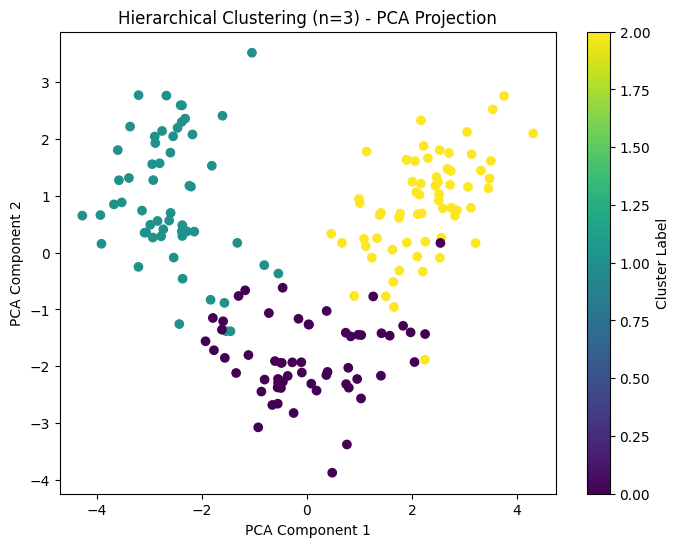

In [7]:
# Visualize clusters for n_clusters=3 (best from metrics)
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hc = hc.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hc, cmap='viridis')
plt.title('Hierarchical Clustering (n=3) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

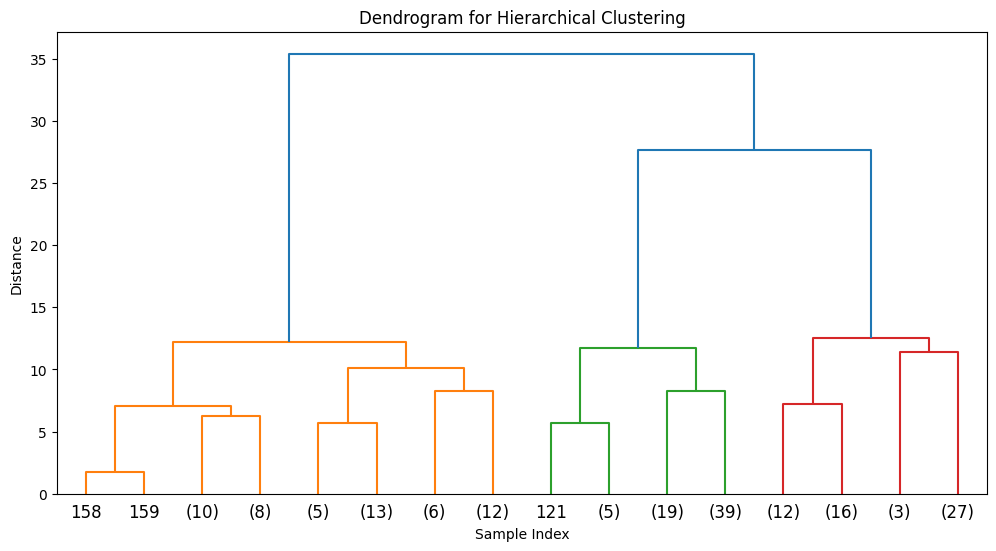

In [8]:
# Generate dendrogram to understand hierarchy
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)  # Truncate for readability
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [9]:
# Step: Apply DBSCAN with different parameters
for eps, min_samples in [(2, 3), (2, 5), (2.5, 5), (3, 3)]:  # Experiment
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels_db = db.fit_predict(X_scaled)
    
    # Number of clusters and noise
    n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
    n_noise = list(labels_db).count(-1)
    
    # Metrics (Silhouette only if >1 cluster)
    sil = silhouette_score(X_scaled, labels_db) if n_clusters > 1 else "N/A"
    hom = homogeneity_score(y_true, labels_db)
    comp = completeness_score(y_true, labels_db)
    
    print(f"\nDBSCAN (eps={eps}, min_samples={min_samples}):")
    print(f"Clusters: {n_clusters}, Noise: {n_noise}")
    print(f"Silhouette Score: {sil if isinstance(sil, str) else f'{sil:.3f}'}")
    print(f"Homogeneity Score: {hom:.3f}")
    print(f"Completeness Score: {comp:.3f}")


DBSCAN (eps=2, min_samples=3):
Clusters: 5, Noise: 64
Silhouette Score: 0.031
Homogeneity Score: 0.442
Completeness Score: 0.372

DBSCAN (eps=2, min_samples=5):
Clusters: 5, Noise: 85
Silhouette Score: -0.033
Homogeneity Score: 0.362
Completeness Score: 0.325

DBSCAN (eps=2.5, min_samples=5):
Clusters: 1, Noise: 24
Silhouette Score: N/A
Homogeneity Score: 0.058
Completeness Score: 0.158

DBSCAN (eps=3, min_samples=3):
Clusters: 2, Noise: 7
Silhouette Score: 0.191
Homogeneity Score: 0.031
Completeness Score: 0.135


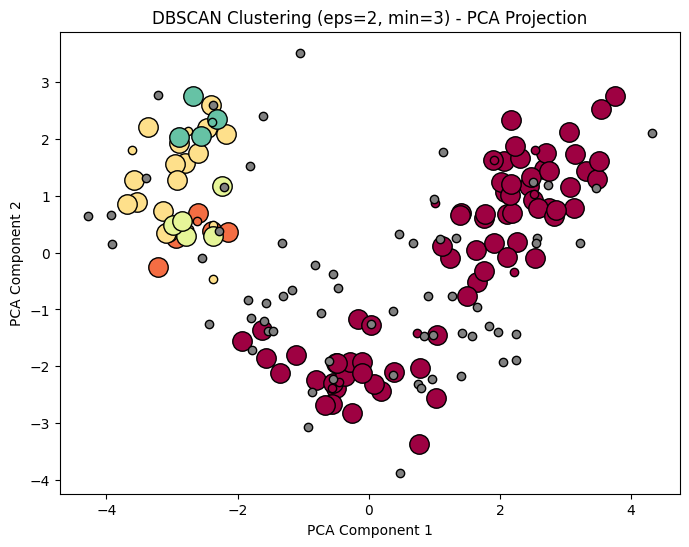

In [10]:
# Visualize for eps=2, min_samples=3 (example with multiple clusters)
db = DBSCAN(eps=2, min_samples=3)
labels_db = db.fit_predict(X_scaled)

# Highlight noise points (gray) and distinguish core/border points
core_samples_mask = np.zeros_like(labels_db, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels_db)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0.5, 0.5, 0.5, 1]  # Gray for noise
    class_member_mask = (labels_db == k)
    xy = X_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)  # Core points larger
    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)  # Border/noise smaller
plt.title('DBSCAN Clustering (eps=2, min=3) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()